## Adding noise to electron and muons signals

These files are stored in `/gpfs/projects/damic/eVSmu_2def`, where we can find electrons, muons and noise. We will select the electron and muons files (they have two variables: energy and noise), so we will add the noise stored in those files to the energy they also have as variable. As a result, we will obtain the noisy energy signals. These new signals (with just one varible: energy) together with the noise in a new directory called `/gpfs/projects/damic/eVSmu_N2def`. First we will copy all files to this new directory where we will perform the transformation.

In [1]:
import os, shutil
import matplotlib.pyplot as plt
import numpy as np
import glob

In [2]:
path = '/gpfs/projects/damic/eVSmu_N2def/'

In [3]:
os.mkdir(path)

In [4]:
orig_dir = '/gpfs/projects/damic/eVSmu_2def/'

In [5]:
num_files = len([f for f in os.listdir(orig_dir)if os.path.isfile(os.path.join(orig_dir, f))])
print('We have', num_files,'files')

num_electrons = len(glob.glob1(orig_dir,"*11.npz"))
num_noise = len(glob.glob1(orig_dir,"*0.npz"))
num_muons = len(glob.glob1(orig_dir,"*13.npz"))

print('There are',num_electrons,'electrons,', num_muons,'muons and',num_noise,'files with noise')

We have 16894 files
There are 5835 electrons, 5224 muons and 5835 files with noise


Now we proceed to add noise to the electron or muon signals:

In [ ]:
files = os.listdir(orig_dir)

for index, file in enumerate(files):
    
    energy_a = np.load(os.path.join(orig_dir,files[index]))['energy']
    
    if file.endswith("0.npz") == False:
        
        noise_a = np.load(os.path.join(orig_dir, files[index]))['noise']

        energy_a = energy_a + noise_a
        
    #copying to the 'eVSmu_N2def' directory
    np.savez(os.path.join(path, file), energy=energy_a)    
    print(index)

ColdCopper_mu+_3p0GeV_N10000_image_evt_9173_ccd_2_ind_2_pdg_-13.npz


Text(0.5, 1.0, 'Muon energy+noise')

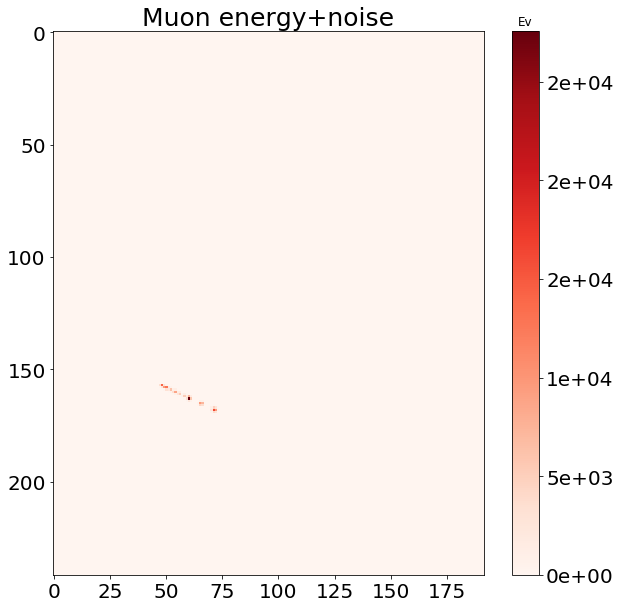

In [22]:
path = '/gpfs/projects/damic/eVSmu_N2def/'
files = os.listdir(path)
f=7
print(files[f])
e = np.load(os.path.join(path, files[f]))['energy']

fig_e_n = plt.figure(figsize=(10,10))
plt.imshow(e, cmap='Reds')
plt.xticks(fontsize=20, rotation=0)
plt.yticks(fontsize=20)
cb = plt.colorbar(format='%.0e')
cb.ax.set_title('Ev')
cb.ax.tick_params(labelsize=20)
plt.title("Muon energy+noise", fontsize = 25)

In [23]:
myPath = '/gpfs/users/lopezs/e_vs_mu_vs_n/noisy_energy'
fig_e_n.savefig(myPath + '/noisy_muon.png')

Text(0.5, 1.0, 'Electron energy+noise')

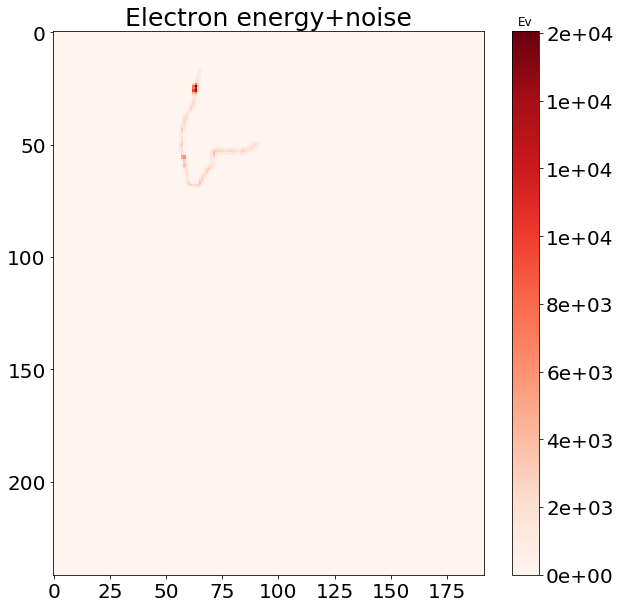

In [24]:
files = os.listdir(path)
f=760
mu = np.load(os.path.join(path, files[f]))['energy']

fig_mu_n = plt.figure(figsize=(10,10))
plt.imshow(mu, cmap='Reds')
plt.xticks(fontsize=20, rotation=0)
plt.yticks(fontsize=20)
cb = plt.colorbar(format='%.0e')
cb.ax.set_title('Ev')
cb.ax.tick_params(labelsize=20)
plt.title("Electron energy+noise", fontsize = 25)

In [25]:
myPath = '/gpfs/users/lopezs/e_vs_mu_vs_n/noisy_energy'
fig_mu_n.savefig(myPath + '/noisy_electron.png')

Text(0.5, 1.0, 'Electron energy')

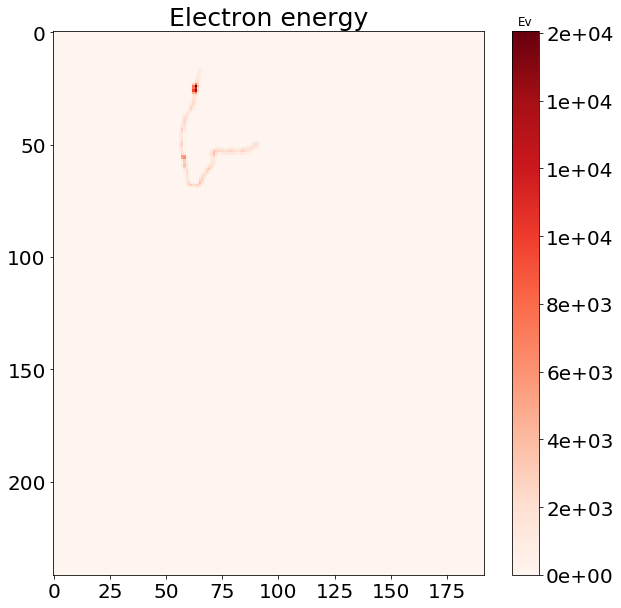

In [28]:
files = os.listdir(orig_dir)
f=760
mu_2 = np.load(os.path.join(orig_dir, files[f]))['energy']

fig_mu_n = plt.figure(figsize=(10,10))
plt.imshow(mu_2, cmap='Reds')
plt.xticks(fontsize=20, rotation=0)
plt.yticks(fontsize=20)
cb = plt.colorbar(format='%.0e')
cb.ax.set_title('Ev')
cb.ax.tick_params(labelsize=20)
plt.title("Electron energy", fontsize = 25)

In [27]:
mu_2 == mu

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])